La idea inicial era aprovechar lo que hice en el segundo notebook, cargádolo de la siguiente forma:
```
from google.colab import files
files.upload()

```
Pero tarda más que si lo hiciera desde el principio, así que empezaré de nuevo. Voy a entrenar mi modelo con el conjunto de 6000 imágenes, a ver qué resultados obtengo.

In [2]:
!wget http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_Dataset.zip
!unzip -q Flickr8k_Dataset.zip
!ls -la

--2018-06-29 07:52:07--  http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_Dataset.zip
Resolving nlp.cs.illinois.edu (nlp.cs.illinois.edu)... 192.17.58.132
Connecting to nlp.cs.illinois.edu (nlp.cs.illinois.edu)|192.17.58.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115419746 (1.0G) [application/zip]
Saving to: ‘Flickr8k_Dataset.zip’

Flickr8k_Dataset.zi  65%[============>       ] 700.75M  6.40MB/s    eta 22s    

Flickr8k_Dataset.zi 100%[===================>]   1.04G  14.0MB/s    in 84s     

2018-06-29 07:53:32 (12.6 MB/s) - ‘Flickr8k_Dataset.zip’ saved [1115419746/1115419746]

total 1089768
drwxr-xr-x 1 root root       4096 Jun 29 07:53 .
drwxr-xr-x 1 root root       4096 Jun 29 07:50 ..
drwx------ 4 root root       4096 Jun 29 07:51 .cache
drwxr-xr-x 3 root root       4096 Jun 29 07:51 .config
drwxr-xr-x 3 root root       4096 Jun 25 16:59 datalab
drwxr-xr-x 2 root root     450560 Oct  3  2012 Flicker8k_Dataset
-rw-r--r-- 1 root root 1115419746 Oct 24  2013 Flickr8k_Dataset.zip
drwxr-xr-x 4 root root       4096 Jun 29 07:51 .forever
drwxr-xr-x 5 root root       4096 Jun 29 07:51 .ipython
drwx------ 3 root root       4096 Jun 29 07:51 .local
drwxrwxr-x 3 root root       4096 Oct 21  2013 __MACOSX


In [3]:
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
 
# extract features from each photo in the directory
def extract_features(directory):
	# load the model
	model = VGG16()
	# re-structure the model
	model.layers.pop()
	model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
	# summarize
	print(model.summary())
	# extract features from each photo
	features = dict()
	for name in listdir(directory):
		# load an image from file
		filename = directory + '/' + name
		image = load_img(filename, target_size=(224, 224))
		# convert the image pixels to a numpy array
		image = img_to_array(image)
		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		# prepare the image for the VGG model
		image = preprocess_input(image)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = name.split('.')[0]
		# store feature
		features[image_id] = feature
		#print('>%s' % name)
	return features
 
# extract features from all images
directory = 'Flicker8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('datalab/features.pkl', 'wb'))

Using TensorFlow backend.


535617536/553467096 [============================>.] - ETA: 1s

553467904/553467096 [==============================] - 31s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_p

In [4]:
!ls -la datalab/

total 130188
drwxr-xr-x 1 root root      4096 Jun 29 09:17 .
drwxr-xr-x 1 root root      4096 Jun 29 07:54 ..
drwxr-xr-x 4 root root      4096 Jun 25 16:59 .config
-rw-r--r-- 1 root root 133296870 Jun 29 09:17 features.pkl


In [5]:
!wget http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_text.zip
!unzip Flickr8k_text.zip

--2018-06-29 09:46:13--  http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_text.zip
Resolving nlp.cs.illinois.edu (nlp.cs.illinois.edu)... 192.17.58.132
Connecting to nlp.cs.illinois.edu (nlp.cs.illinois.edu)|192.17.58.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2340801 (2.2M) [application/zip]
Saving to: ‘Flickr8k_text.zip’

Flickr8k_text.zip   100%[===================>]   2.23M  2.06MB/s    in 1.1s    

2018-06-29 09:46:14 (2.06 MB/s) - ‘Flickr8k_text.zip’ saved [2340801/2340801]

Archive:  Flickr8k_text.zip
  inflating: CrowdFlowerAnnotations.txt  
  inflating: ExpertAnnotations.txt   
  inflating: Flickr8k.lemma.token.txt  
  inflating: __MACOSX/._Flickr8k.lemma.token.txt  
  inflating: Flickr8k.token.txt      
  inflating: Flickr_8k.devImages.txt  
  inflating: Flickr_8k.testImages.txt  
  inflating: Flickr_8k.trainImages.txt  
  inflating: readme.txt              


In [6]:
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
filename = 'Flickr8k.token.txt'
# load descriptions
doc = load_doc(filename)


# extract descriptions for images
def load_descriptions(doc):
	mapping = dict()
	# process lines
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		if len(line) < 2:
			continue
		# take the first token as the image id, the rest as the description
		image_id, image_desc = tokens[0], tokens[1:]
		# remove filename from image id
		image_id = image_id.split('.')[0]
		# convert description tokens back to string
		image_desc = ' '.join(image_desc)
		# create the list if needed
		if image_id not in mapping:
			mapping[image_id] = list()
		# store description
		mapping[image_id].append(image_desc)
	return mapping

In [7]:
# parse descriptions
# extract descriptions for images
def load_descriptions(doc):
	mapping = dict()
	# process lines
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		if len(line) < 2:
			continue
		# take the first token as the image id, the rest as the description
		image_id, image_desc = tokens[0], tokens[1:]
		# remove filename from image id
		image_id = image_id.split('.')[0]
		# convert description tokens back to string
		image_desc = ' '.join(image_desc)
		# create the list if needed
		if image_id not in mapping:
			mapping[image_id] = list()
		# store description
		mapping[image_id].append(image_desc)
	return mapping
 
# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))

Loaded: 8092 


In [8]:
import string
 
def clean_descriptions(descriptions):
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for key, desc_list in descriptions.items():
		for i in range(len(desc_list)):
			desc = desc_list[i]
			# tokenize
			desc = desc.split()
			# convert to lower case
			desc = [word.lower() for word in desc]
			# remove punctuation from each token
			desc = [w.translate(table) for w in desc]
			# remove hanging 's' and 'a'
			desc = [word for word in desc if len(word)>1]
			# remove tokens with numbers in them
			desc = [word for word in desc if word.isalpha()]
			# store as string
			desc_list[i] =  ' '.join(desc)
 
# clean descriptions
clean_descriptions(descriptions)

In [9]:
# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
	lines = list()
	for key, desc_list in descriptions.items():
		for desc in desc_list:
			lines.append(key + ' ' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()
 
# save descriptions
save_descriptions(descriptions, 'datalab/descriptions.txt')

In [10]:
!ls -la datalab/

total 133064
drwxr-xr-x 1 root root      4096 Jun 29 09:46 .
drwxr-xr-x 1 root root      4096 Jun 29 09:46 ..
drwxr-xr-x 4 root root      4096 Jun 25 16:59 .config
-rw-r--r-- 1 root root   2943284 Jun 29 09:46 descriptions.txt
-rw-r--r-- 1 root root 133296870 Jun 29 09:17 features.pkl


In [11]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
 
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
 
# load a pre-defined list of photo identifiers
def load_set(filename):
  doc = load_doc(filename)
  dataset = list()
  # process line by line
  for line in doc.split('\n'):
    # skip empty lines
    if len(line) < 1:
      continue
      # get the image identifier
    identifier = line.split('.')[0]
    dataset.append(identifier)
  return set(dataset)
 
# load clean descriptions into memory 
def load_descriptions_from_file(filename, dataset):
  # load document
  doc = load_doc(filename)
  descriptions = dict()
  for line in doc.split('\n'):
    # split line by white space
    tokens = line.split()
    # split id from description
    image_id, image_desc = tokens[0], tokens[1:]
    # skip images not in the set
    if image_id in dataset:
      # create list
      if image_id not in descriptions:
        descriptions[image_id] = list()
      # wrap description in tokens
      desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
      # store
      descriptions[image_id].append(desc)
  return descriptions
 
# load photo features
def load_photo_features(filename, dataset):
  # load all features
  all_features = load(open(filename, 'rb'))
  # filter features
  features = {k: all_features[k] for k in dataset}
  return features
 
# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
  all_desc = list()
  for key in descriptions.keys():
    [all_desc.append(d) for d in descriptions[key]]
  return all_desc
 
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
  lines = to_lines(descriptions)
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer
 
# calculate the length of the description with the most words
def max_length(descriptions):
  lines = to_lines(descriptions)
  return max(len(d.split()) for d in lines)
 
# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, desc_list, photo):
  X1, X2, y = list(), list(), list()
  # walk through each description for the image
  for desc in desc_list:
    # encode the sequence
    seq = tokenizer.texts_to_sequences([desc])[0]
    # split one sequence into multiple X,y pairs
    for i in range(1, len(seq)):
      # split into input and output pair
      in_seq, out_seq = seq[:i], seq[i]
      # pad input sequence
      in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
      # encode output sequence
      out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
      # store
      X1.append(photo)
      X2.append(in_seq)
      y.append(out_seq)
  return array(X1), array(X2), array(y)
 
# define the captioning model
def define_model(vocab_size, max_length):
  # feature extractor model
  inputs1 = Input(shape=(4096,))
  fe1 = Dropout(0.5)(inputs1)
  fe2 = Dense(256, activation='relu')(fe1)
  # sequence model
  inputs2 = Input(shape=(max_length,))
  se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
  se2 = Dropout(0.5)(se1)
  se3 = LSTM(256)(se2)
  # decoder model
  decoder1 = add([fe2, se3])
  decoder2 = Dense(256, activation='relu')(decoder1)
  outputs = Dense(vocab_size, activation='softmax')(decoder2)
  # tie it together [image, seq] [word]
  model = Model(inputs=[inputs1, inputs2], outputs=outputs)
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam')
  # summarize model
  model.summary()
  #plot_model(model, to_file='model.png', show_shapes=True)
  return model
 
# data generator, intended to be used in a call to model.fit_generator()
def data_generator(descriptions, photos, tokenizer, max_length):
  # loop for ever over images
  while 1:
    for key, desc_list in descriptions.items():
      # retrieve the photo feature
      photo = photos[key][0]
      in_img, in_seq, out_word = create_sequences(tokenizer, max_length, desc_list, photo)
      yield [[in_img, in_seq], out_word]

In [8]:
# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_descriptions_from_file('datalab/descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('datalab/features.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
maxlength = max_length(train_descriptions)
print('Description Length: %d' % maxlength)
 
# define the model
model = define_model(vocab_size, maxlength)
# train the model, run epochs manually and save after each epoch
epochs = 20
steps = len(train_descriptions)
hists = []
for i in range(epochs):
  # create the data generator
  generator = data_generator(train_descriptions, train_features, tokenizer, maxlength)
  # fit for one epoch
  hist = model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
  # guardo las perdidas en un historico para ver qué modelo es mejor
  hists.append(hist.history['loss'])
  # save model
  model.save('model_' + str(i) + '.h5')

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 7579
Description Length: 34
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 34)           0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 34, 256)      1940224     input_6[0][0]                    
__________________________________________________________________________________________________
dropout_5 (Dropout)             (None, 4096)         0           input_5[0][0]                    
______

ResourceExhaustedError: ignored

No puedo continuar porque me da una ResourceExhaustedException. Por mucho que lo he repetido desde diferentes cuentas sigue dando el mismo fallo. Voy a intentar reducir las capas densas.

In [17]:
# define the captioning model
def define_model(vocab_size, max_length):
  # feature extractor model
  inputs1 = Input(shape=(4096,))
  fe1 = Dropout(0.5)(inputs1)
  fe2 = Dense(128, activation='relu')(fe1)
  # sequence model
  inputs2 = Input(shape=(max_length,))
  se1 = Embedding(vocab_size, 128, mask_zero=True)(inputs2)
  se2 = Dropout(0.5)(se1)
  se3 = LSTM(128)(se2)
  # decoder model
  decoder1 = add([fe2, se3])
  decoder2 = Dense(128, activation='relu')(decoder1)
  outputs = Dense(vocab_size, activation='softmax')(decoder2)
  # tie it together [image, seq] [word]
  model = Model(inputs=[inputs1, inputs2], outputs=outputs)
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam')
  # summarize model
  model.summary()
  #plot_model(model, to_file='model.png', show_shapes=True)
  return model

In [20]:
# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_descriptions_from_file('datalab/descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('datalab/features.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
maxlength = max_length(train_descriptions)
print('Description Length: %d' % maxlength)
 
# define the model
model = define_model(vocab_size, maxlength)
# train the model, run epochs manually and save after each epoch
epochs = 20
steps = len(train_descriptions)
#steps = 10
hists = []
for i in range(epochs):
  # create the data generator
  generator = data_generator(train_descriptions, train_features, tokenizer, maxlength)
  # fit for one epoch
  hist = model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
  # guardo las perdidas en un historico para ver qué modelo es mejor
  hists.append(hist.history['loss'])
  # save model
  model.save('model_' + str(i) + '.h5')

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 7579
Description Length: 34
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 34)           0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 34, 128)      970112      input_5[0][0]                    
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 4096)         0           input_4[0][0]                    
______

6000/6000 [==============================] - 876s 146ms/step - loss: 4.7381


Epoch 1/1
6000/6000 [==============================] - 873s 145ms/step - loss: 3.9779
Epoch 1/1


6000/6000 [==============================] - 876s 146ms/step - loss: 3.7381
Epoch 1/1


6000/6000 [==============================] - 872s 145ms/step - loss: 3.6042
Epoch 1/1


6000/6000 [==============================] - 870s 145ms/step - loss: 3.5116
Epoch 1/1


6000/6000 [==============================] - 883s 147ms/step - loss: 3.4476
Epoch 1/1


6000/6000 [==============================] - 887s 148ms/step - loss: 3.3994
Epoch 1/1


6000/6000 [==============================] - 877s 146ms/step - loss: 3.3729
Epoch 1/1


6000/6000 [==============================] - 853s 142ms/step - loss: 3.3410
Epoch 1/1


6000/6000 [==============================] - 831s 138ms/step - loss: 3.3189
Epoch 1/1


6000/6000 [==============================] - 830s 138ms/step - loss: 3.2973
Epoch 1/1


6000/6000 [==============================] - 839s 140ms/step - loss: 3.2832
Epoch 1/1


6000/6000 [==============================] - 842s 140ms/step - loss: 3.2719
Epoch 1/1


6000/6000 [==============================] - 846s 141ms/step - loss: 3.2583
Epoch 1/1


6000/6000 [==============================] - 879s 147ms/step - loss: 3.2527
Epoch 1/1


6000/6000 [==============================] - 868s 145ms/step - loss: 3.2432
Epoch 1/1


6000/6000 [==============================] - 861s 143ms/step - loss: 3.2370
Epoch 1/1


6000/6000 [==============================] - 875s 146ms/step - loss: 3.2286
Epoch 1/1


6000/6000 [==============================] - 853s 142ms/step - loss: 3.2250
Epoch 1/1


6000/6000 [==============================] - 875s 146ms/step - loss: 3.2173


No handles with labels found to put in legend.


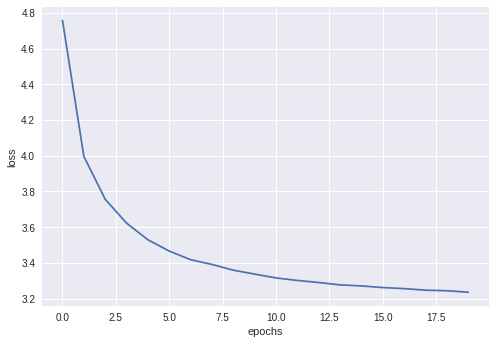

In [21]:
import matplotlib.pyplot as plt

plt.plot(hists)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [22]:
!ls -la

total 1686304
drwxr-xr-x 1 root root       4096 Jun 29 01:53 .
drwxr-xr-x 1 root root       4096 Jun 28 20:49 ..
drwx------ 4 root root       4096 Jun 28 20:51 .cache
drwxr-xr-x 3 root root       4096 Jun 28 20:51 .config
-rw-r--r-- 1 root root    2918552 Oct 14  2013 CrowdFlowerAnnotations.txt
drwxr-xr-x 1 root root       4096 Jun 28 21:02 datalab
-rw-r--r-- 1 root root     346674 Oct 14  2013 ExpertAnnotations.txt
drwxr-xr-x 2 root root     430080 Oct  3  2012 Flicker8k_Dataset
-rw-r--r-- 1 root root 1115419746 Oct 24  2013 Flickr8k_Dataset.zip
-rw-r--r-- 1 root root      25801 Oct 10  2013 Flickr_8k.devImages.txt
-rw-r--r-- 1 root root    3244761 Feb 16  2012 Flickr8k.lemma.token.txt
-rw-r--r-- 1 root root      25775 Oct 10  2013 Flickr_8k.testImages.txt
-rw-r--r-- 1 root root    2340801 Oct 28  2013 Flickr8k_text.zip
-rw-r--r-- 1 root root    3395237 Oct 14  2013 Flickr8k.token.txt
-rw-r--r-- 1 root root     154678 Oct 10  2013 Flickr_8k.trainImages.txt
drwxr-xr-x 4 root root      

** Evaluar el modelo: ** Después de estar entrenando el modelo unas 5 horas guardé el archivo model_19.h5 para poder cargarlo posteriormente y evaluar el modelo... pero no ha podido ser, porque al cargarlo usando las líneas que comentaba antes:
```
from google.colab import files
files.upload()
```
me da un error
```
[object CloseEvent]
```
Y se desconecta el entorno. Así que he entrenado de nuevo sólo una época, aunque he dejado el código tal cual sería si cogiera la época 20. La evaluación del modelo (BLEU y la nueva predicción a partir de una foto nueva) la he hecho con la primera época, de ahí los resultados.

In [15]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
 
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)
  
# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features
 
# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc
 
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer
 
# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)
 
# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None
 
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text
 
# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
 
# prepare tokenizer on train set
 
# load training dataset (6K)
filename = 'Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_descriptions_from_file('datalab/descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
# save the tokenizer: Para usarlo después cuando generemos nuevas descripciones a partir del modelo
dump(tokenizer, open('datalab/tokenizer.pkl', 'wb'))
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
maxlength = max_length(train_descriptions)
print('Description Length: %d' % maxlength)
 
# prepare test set
 
# load test set
filename = 'Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_descriptions_from_file('datalab/descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('datalab/features.pkl', test)
print('Photos: test=%d' % len(test_features))
 
# load the model
# filename = 'model-ep002-loss3.245-val_loss3.612.h5'
filename = 'model_19.h5'
model = load_model(filename)
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, maxlength)

Dataset: 6000
Descriptions: train=6000
Vocabulary Size: 7579
Description Length: 34
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
BLEU-1: 0.574492
BLEU-2: 0.313153
BLEU-3: 0.206707
BLEU-4: 0.090890


** Usar el modelo para generar nuevas descripciones ** 

In [16]:
from google.colab import files
files.upload()

Saving example.jpg to example.jpg


In [17]:
!ls -la

total 1102268
drwxr-xr-x 1 root root       4096 Jun 29 10:24 .
drwxr-xr-x 1 root root       4096 Jun 29 07:50 ..
drwx------ 4 root root       4096 Jun 29 07:51 .cache
drwxr-xr-x 3 root root       4096 Jun 29 07:51 .config
-rw-r--r-- 1 root root    2918552 Oct 14  2013 CrowdFlowerAnnotations.txt
drwxr-xr-x 1 root root       4096 Jun 29 10:21 datalab
-rw-r--r-- 1 root root     315475 Jun 29 10:24 example.jpg
-rw-r--r-- 1 root root     346674 Oct 14  2013 ExpertAnnotations.txt
drwxr-xr-x 2 root root     450560 Oct  3  2012 Flicker8k_Dataset
-rw-r--r-- 1 root root 1115419746 Oct 24  2013 Flickr8k_Dataset.zip
-rw-r--r-- 1 root root      25801 Oct 10  2013 Flickr_8k.devImages.txt
-rw-r--r-- 1 root root    3244761 Feb 16  2012 Flickr8k.lemma.token.txt
-rw-r--r-- 1 root root      25775 Oct 10  2013 Flickr_8k.testImages.txt
-rw-r--r-- 1 root root    2340801 Oct 28  2013 Flickr8k_text.zip
-rw-r--r-- 1 root root    3395237 Oct 14  2013 Flickr8k.token.txt
-rw-r--r-- 1 root root     154678 Oct 10  

In [18]:
# load the tokenizer
tokenizer = load(open('datalab/tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
maxlength = 34

In [19]:
def extract_features_one_image(filename):
	# load the model
	model = VGG16()
	# re-structure the model
	model.layers.pop()
	model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
	# load the photo
	image = load_img(filename, target_size=(224, 224))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature
 
# load and prepare the photograph
photo = extract_features_one_image('Flicker8k_Dataset/1084040636_97d9633581.jpg')
# generate description
description = generate_desc(model, tokenizer, photo, maxlength)
print(description)

startseq two dogs are playing in the grass endseq


Detecta que hay dos perros, tiene cierto sentido porque la imágen del reflejo confunde a la red :-)

![texto alternativo](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/09/example.jpg)

Me quedo con las ganas de poder obtener mejores resultados, he encontrado bastantes dificultades con el Colab a la hora de avanzar.